In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix,r2_score,silhouette_score,accuracy_score
import pickle
plt.style.use ("dark_background")

In [2]:
data = pd.read_csv("gld_price_data.csv")
data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [4]:
x_axis = list(data['Date'])
y_axis = list(data['GLD'])

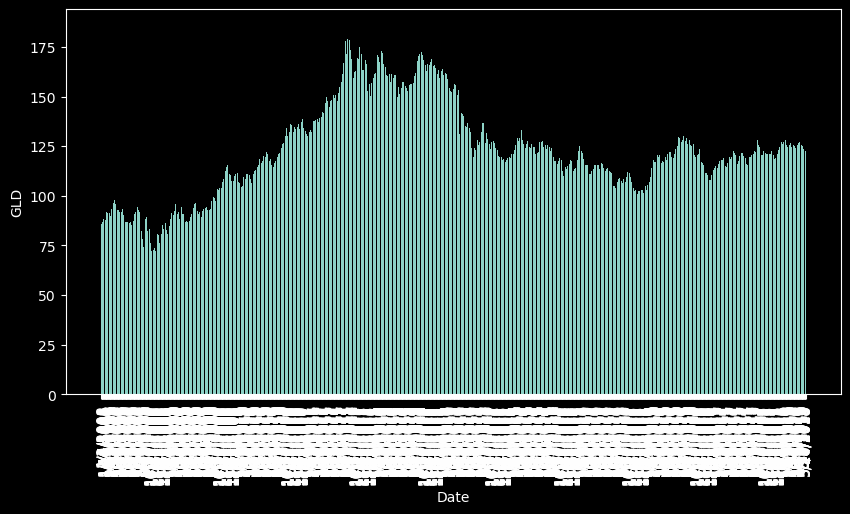

In [5]:
plt.figure(figsize=(10,5))
plt.bar(x_axis,y_axis )
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('GLD')
plt.show()

In [6]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
data.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

<Axes: >

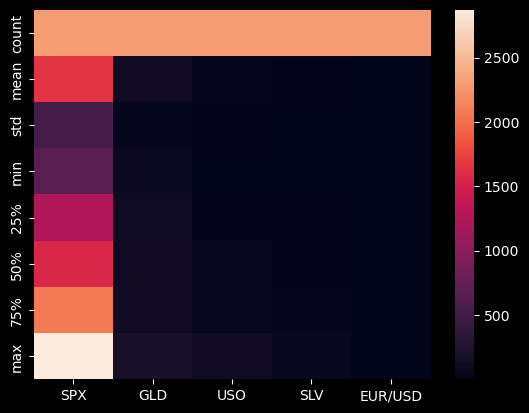

In [8]:
sns.heatmap(data.describe())

In [9]:
LE = LabelEncoder()
data['Date'] = LE.fit_transform(data['Date'])

In [10]:
data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,70,1447.160034,84.860001,78.470001,15.1800,1.471692
1,152,1447.160034,85.570000,78.370003,15.2850,1.474491
2,174,1411.630005,85.129997,77.309998,15.1670,1.475492
3,198,1416.180054,84.769997,75.500000,15.0530,1.468299
4,206,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,1615,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,1621,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,1459,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,1485,2730.129883,124.489998,14.380000,15.5600,1.193118


<Axes: >

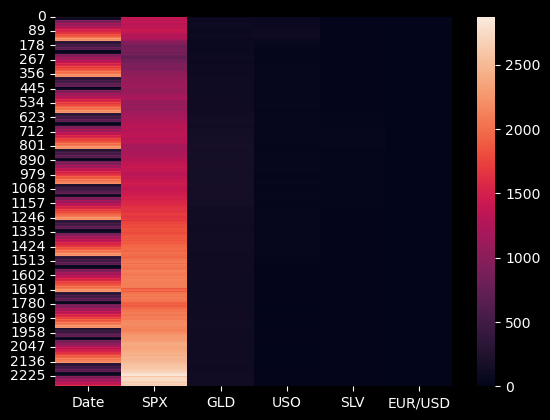

In [11]:
sns.heatmap(data)

In [12]:
corr = data.corr()
corr

,Date,SPX,GLD,USO,SLV,EUR/USD
Date,1.000000,-0.007864,0.025020,0.074025,0.036714,0.033045
SPX,-0.007864,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.025020,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,0.074025,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,0.036714,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,0.033045,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

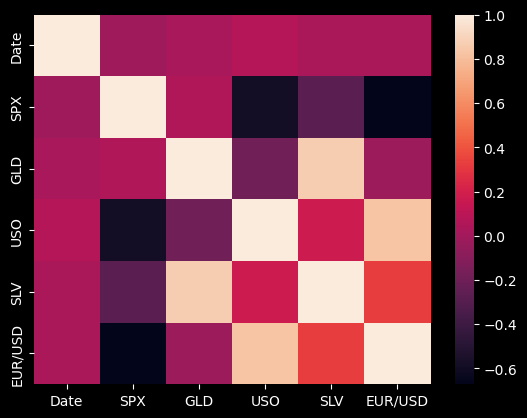

In [13]:
sns.heatmap(corr)

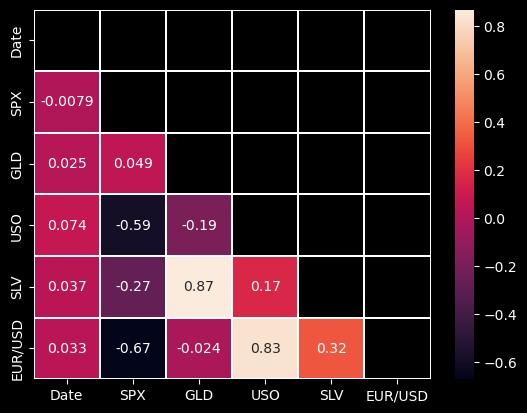

In [14]:
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, linewidth=.10, mask=matrix, cmap="rocket");

<Axes: ylabel='Count'>

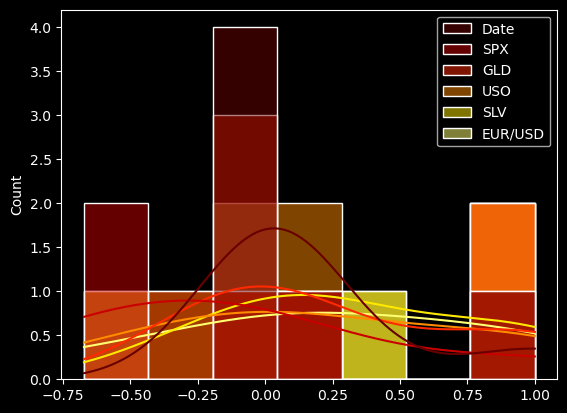

In [15]:
sns.histplot(data=corr,kde=True,palette='hot')

<Axes: ylabel='Count'>

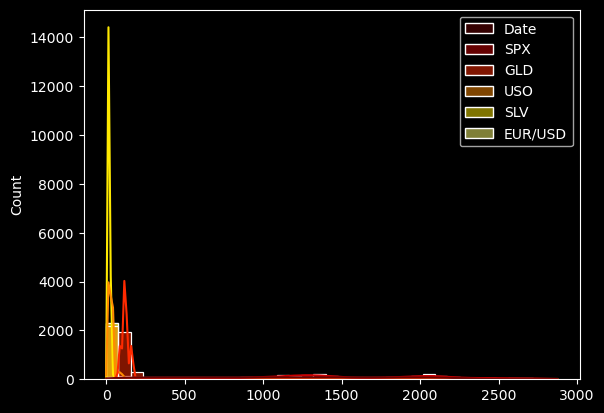

In [16]:
sns.histplot(data=data,kde=True,palette='hot')

C:\Users\mahmo\AppData\Local\Temp\ipykernel_13480\1721992564.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data['GLD'],kde=True,palette='hot')


<Axes: xlabel='GLD', ylabel='Count'>

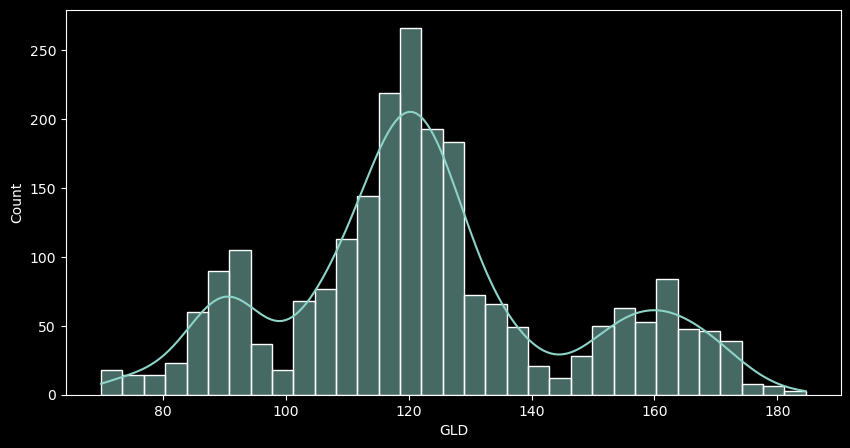

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(data=data['GLD'],kde=True,palette='hot')

In [18]:
n_unique = data.nunique()
n_unique

Date       2290
SPX        2277
GLD        1930
USO        1514
SLV        1331
EUR/USD    2066
dtype: int64

<BarContainer object of 2290 artists>

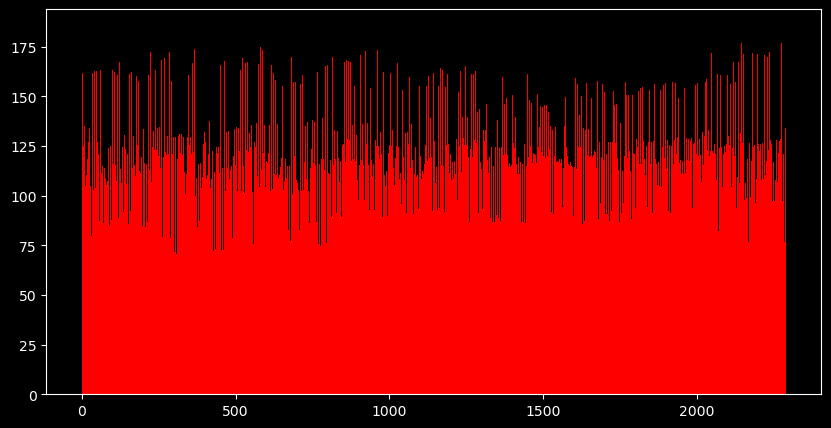

In [19]:
plt.figure(figsize=(10,5))
plt.bar(data['Date'],data['GLD'],color='red')

In [20]:
y = data['GLD'].values
y

array([ 84.860001,  85.57    ,  85.129997, ..., 125.18    , 124.489998,
       122.5438  ])

In [21]:
x = data.drop(['GLD'],axis = 1).values
x

array([[7.00000000e+01, 1.44716003e+03, 7.84700010e+01, 1.51800000e+01,
        1.47169200e+00],
       [1.52000000e+02, 1.44716003e+03, 7.83700030e+01, 1.52850000e+01,
        1.47449100e+00],
       [1.74000000e+02, 1.41163000e+03, 7.73099980e+01, 1.51670000e+01,
        1.47549200e+00],
       ...,
       [1.45900000e+03, 2.72307007e+03, 1.44100000e+01, 1.57400000e+01,
        1.19175300e+00],
       [1.48500000e+03, 2.73012988e+03, 1.43800000e+01, 1.55600000e+01,
        1.19311800e+00],
       [1.49600000e+03, 2.72578003e+03, 1.44058000e+01, 1.54542000e+01,
        1.18203300e+00]])

In [22]:
SC = StandardScaler()
x[:,:] = SC.fit_transform(x[:,:])
x

array([[-1.62540504, -0.39914541,  2.38880956, -0.6917197 ,  1.42975293],
       [-1.50136296, -0.39914541,  2.38368652, -0.67691224,  1.45103511],
       [-1.46808338, -0.46760428,  2.32938091, -0.69355301,  1.45864621],
       ...,
       [ 0.47574675,  2.05926403, -0.89307824, -0.61274655, -0.69876145],
       [ 0.51507717,  2.0728668 , -0.89461519, -0.63813078, -0.68838269],
       [ 0.53171696,  2.06448555, -0.89329341, -0.65305106, -0.77266741]])

In [23]:
df_x = pd.DataFrame(x,columns = ['Date','SPX','USO','SLV','EUR/USD'])
df_x

,Date,SPX,USO,SLV,EUR/USD
0,-1.625405,-0.399145,2.388810,-0.691720,1.429753
1,-1.501363,-0.399145,2.383687,-0.676912,1.451035
2,-1.468083,-0.467604,2.329381,-0.693553,1.458646
3,-1.431778,-0.458837,2.236652,-0.709630,1.403954
4,-1.419677,-0.508915,2.265342,-0.633900,2.079145
...,...,...,...,...,...
2285,0.711729,1.960708,-0.911009,-0.645182,-0.736505
2286,0.720805,2.010555,-0.895128,-0.642361,-0.752222
2287,0.475747,2.059264,-0.893078,-0.612747,-0.698761
2288,0.515077,2.072867,-0.894615,-0.638131,-0.688383


<Axes: >

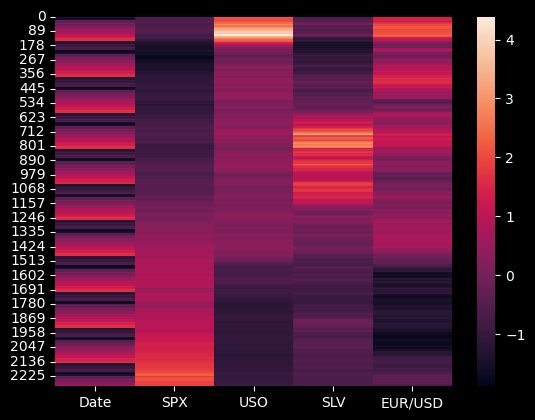

In [24]:
sns.heatmap(df_x)

<Axes: ylabel='Count'>

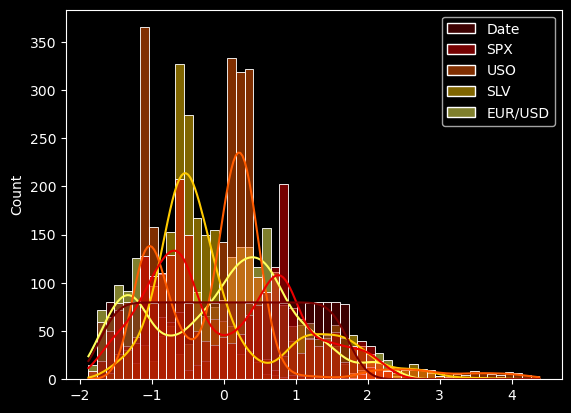

In [25]:
sns.histplot(data=df_x,kde=True,palette='hot')

In [26]:
x_train,x_test,y_train,y_test = train_test_split ( x , y , test_size = 0.2 , random_state = 0)

In [27]:
pca = PCA()
x = pca.fit_transform(x)

In [28]:
x

array([[ 2.0939125 ,  1.7505464 , -1.43325183, -1.15250977,  0.44605775],
       [ 2.1137331 ,  1.62724326, -1.429178  , -1.14911032,  0.42460546],
       [ 2.12087824,  1.60161142, -1.43516645, -1.06493356,  0.38927192],
       ...,
       [-2.12271824, -0.63219765, -0.15639568, -1.03069407, -0.36853966],
       [-2.12970268, -0.67021111, -0.18312482, -1.03835975, -0.38334984],
       [-2.17741607, -0.68853617, -0.19034559, -1.00608687, -0.32034706]])

<Axes: >

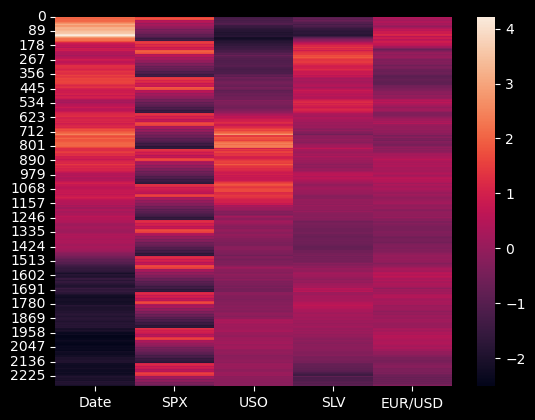

In [29]:
sns.heatmap(pd.DataFrame(x,columns = ['Date','SPX','USO','SLV','EUR/USD']))

In [30]:
pd.DataFrame(x,columns = ['Date','SPX','USO','SLV','EUR/USD'])

,Date,SPX,USO,SLV,EUR/USD
0,2.093912,1.750546,-1.433252,-1.152510,0.446058
1,2.113733,1.627243,-1.429178,-1.149110,0.424605
2,2.120878,1.601611,-1.435166,-1.064934,0.389272
3,2.030334,1.563845,-1.418423,-1.011357,0.367641
4,2.490186,1.579154,-1.430818,-1.173498,-0.108754
...,...,...,...,...,...
2285,-2.100966,-0.857469,-0.200187,-0.909140,-0.351639
2286,-2.126161,-0.871611,-0.198747,-0.953583,-0.335445
2287,-2.122718,-0.632198,-0.156396,-1.030694,-0.368540
2288,-2.129703,-0.670211,-0.183125,-1.038360,-0.383350


<Axes: ylabel='Count'>

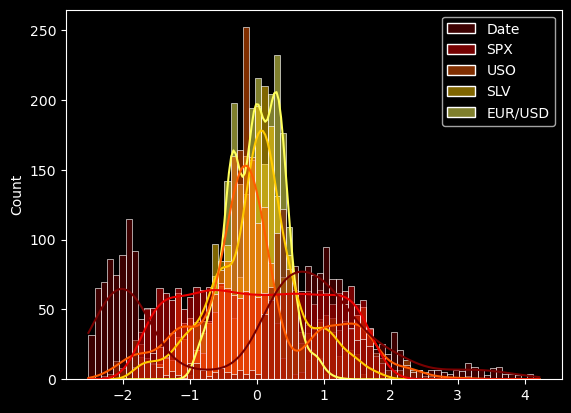

In [31]:
sns.histplot(data=pd.DataFrame(x,columns = ['Date','SPX','USO','SLV','EUR/USD']),kde=True,palette='hot')

In [32]:
LE = LinearRegression()
LE.fit(x_train,y_train)
y_pred = LE.predict(x_test)
print(y_pred)

[123.95810488 118.70371668 167.9372295  120.98535615  99.22298182
 144.01501451 124.6705817  110.13387114 141.53947457 112.70447526
 111.56284395 121.37791713  93.47078808 147.7085557  122.65494946
 116.12841747  90.63312552  95.33299178  96.66799902 118.82232674
  81.57913134 117.92652129 122.75683684 178.38933926 176.54479613
 168.34578698 116.50856274 152.28265712 127.53379675 114.04858965
 119.58272331 110.86658671 122.99375324 121.70924075 103.68097309
 119.24150844  79.58350711 116.49674375 121.96354196 168.72794988
 105.52129454 138.35616376 106.18580547 145.39875256 140.04179907
 164.00221073 120.34104361 149.7105235  150.19334822 122.58631389
 116.66017916 109.63964499 117.18144609 111.52427134 141.5222125
 116.91533644 115.15049915  87.85302855 143.79106658 120.74506921
  95.03376598 116.53317101  80.08456307 197.17295486 118.68133899
 123.46950839 120.54749443 112.78291932 159.18617201 123.26604599
 120.76095712 177.95444878 115.03712815 161.93243865 112.00745872
 128.420022

In [33]:
print(r2_score(y_test,y_pred))

0.8529351395861098


In [34]:
df_comp = pd.DataFrame({'Actual':y_test , 'Predict':y_pred})
df_comp

,Actual,Predict
0,128.789993,123.958105
1,115.620003,118.703717
2,139.220001,167.937230
3,120.930000,120.985356
4,93.040001,99.222982
...,...,...
453,120.360001,122.325194
454,129.130005,121.906417
455,159.869995,150.934039
456,117.339996,110.047019


In [35]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
y_pred = RFR.predict(x_test)
print(y_pred)

[127.80969869 116.71659969 139.66409944 121.38539972  94.13510001
 154.3318011  118.06640091 113.38700136 152.74719996 105.5772009
 103.26479898 120.04429967  92.30979926 156.0206016  121.48269875
 117.38720077  87.67749815  92.05799909  92.71820009 126.10199976
  83.23519976 117.49949894 126.61339876 173.28299735 169.36359783
 139.2257016  114.11509911 159.98550157 134.22950026 115.5433004
 112.29320063 104.95220163 128.45980028 122.1203997   98.6359998
 120.56459972  84.38129985 115.12260031 127.54499887 139.91889877
 105.77960052 131.30670139 108.30359927 135.26169925 133.76249863
 150.77710046 119.62480083 157.03250002 155.47190111 127.5827995
 123.47200069 116.40109844 123.8522001  119.16579982 153.37950103
 121.9728999  112.41200033  86.83239885 155.63799946 117.97570121
  88.27539886 114.31859947  83.05649942 146.26839721 125.27809964
 125.91589921 125.07479964 120.84660019 168.73600092 121.64739913
 125.55650124 173.05159823 121.24020147 167.86610203 118.73100039
 127.95189921 

In [36]:
df_comp = pd.DataFrame({'Actual':y_test , 'Predict':y_pred})
df_comp

,Actual,Predict
0,128.789993,127.809699
1,115.620003,116.716600
2,139.220001,139.664099
3,120.930000,121.385400
4,93.040001,94.135100
...,...,...
453,120.360001,120.132801
454,129.130005,129.192299
455,159.869995,160.504500
456,117.339996,117.126700


In [37]:
print(r2_score(y_test,y_pred))

0.9909562779026619


<Axes: title={'center': ' Actual & Predict '}>

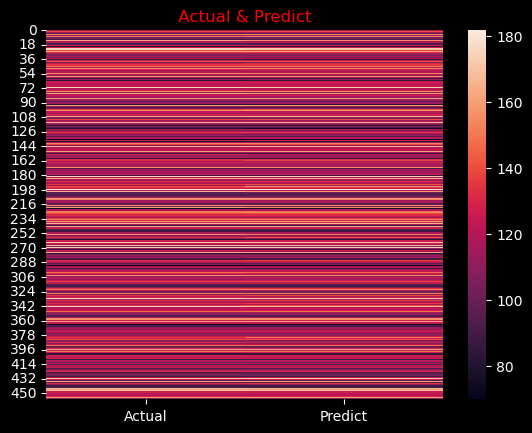

In [38]:
plt.title (' Actual & Predict ',color = 'r')
sns.heatmap(df_comp)

([<matplotlib.patches.Wedge at 0x1f58fbc2ec0>,
 [Text(-0.0310976349775069, -1.0995603380891865, 'Accuracy'),
  Text(0.031097647846040976, 1.0995603377252399, 'Error')],
 [Text(-0.016962346351367397, -0.5997601844122834, '99%'),
  Text(0.0169623533705678, 0.5997601842137672, '1%')])

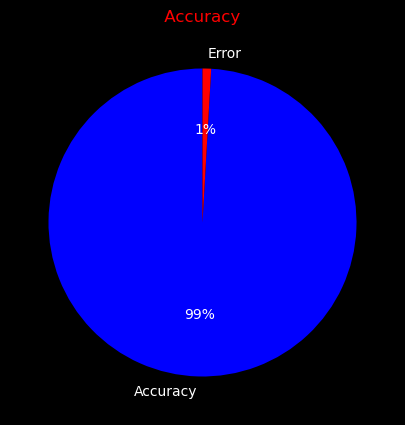

In [39]:
plt.figure(figsize=(10,5))
data = [0.991,0.009]
names = ['Accuracy','Error']
plt.title (' Accuracy ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)

In [40]:
import pickle
pickle.dump(RFR, open('Gold Price Prediction.pkl', 'wb'))

In [41]:
pickled_model = pickle.load(open('Gold Price Prediction.pkl', 'rb'))

In [42]:
pickled_model.predict(x_test)

array([127.80969869, 116.71659969, 139.66409944, 121.38539972,
        94.13510001, 154.3318011 , 118.06640091, 113.38700136,
       152.74719996, 105.5772009 , 103.26479898, 120.04429967,
        92.30979926, 156.0206016 , 121.48269875, 117.38720077,
        87.67749815,  92.05799909,  92.71820009, 126.10199976,
        83.23519976, 117.49949894, 126.61339876, 173.28299735,
       169.36359783, 139.2257016 , 114.11509911, 159.98550157,
       134.22950026, 115.5433004 , 112.29320063, 104.95220163,
       128.45980028, 122.1203997 ,  98.6359998 , 120.56459972,
        84.38129985, 115.12260031, 127.54499887, 139.91889877,
       105.77960052, 131.30670139, 108.30359927, 135.26169925,
       133.76249863, 150.77710046, 119.62480083, 157.03250002,
       155.47190111, 127.5827995 , 123.47200069, 116.40109844,
       123.8522001 , 119.16579982, 153.37950103, 121.9728999 ,
       112.41200033,  86.83239885, 155.63799946, 117.97570121,
        88.27539886, 114.31859947,  83.05649942, 146.26

In [47]:
XT = pd.DataFrame(x_test)
XT = XT.tail(1)
XT

,0,1,2,3,4
457,1.502876,0.574134,-0.866438,-0.859538,-1.175227


In [48]:
output = pickled_model.predict(XT)
output = int(output)
print(output)

108


In [43]:
#!pip install pyttsx3

In [45]:
import pyttsx3

In [52]:
converter = pyttsx3.init()
# Set properties before adding
# Things to say
# Sets speed percent
# Can be more than 100
converter.setProperty('rate', 120)
# Set volume 0-1
converter.setProperty('volume', 1)
# Queue the entered text
# There will be a pause between
# each one like a pause in
# a sentence
if output == 0 :
    converter.say("Hello Mahmoud Ragab, I am Dr.Emo and I am here to help you. We are very happy to receive this news. We disclosed this data and it turned out to be the data of an uninfected person. Congratulations")
else :
    converter.say("Hello Mahmoud Ragab, I am Dr. Emo and I am here to help you. I am very sorry to tell you this sad news. We have disclosed this data and it turns out that he has a cancerous tumor. You should go to the doctor as soon as possible.")
# Empties the say() queue
# Program will not continue
# until all speech is done talking
converter.runAndWait()